In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

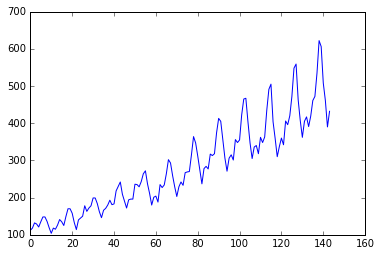

In [20]:
dataset = pd.read_csv('datasets/international-airline-passengers.csv', 
                      usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

In [40]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [22]:
# fix random seed for reproducability
numpy.random.seed(7)

In [23]:
dataset = dataset.values
dataset = dataset.astype('float32')

In [24]:
dataset

array([[ 112.],
       [ 118.],
       [ 132.],
       [ 129.],
       [ 121.],
       [ 135.],
       [ 148.],
       [ 148.],
       [ 136.],
       [ 119.],
       [ 104.],
       [ 118.],
       [ 115.],
       [ 126.],
       [ 141.],
       [ 135.],
       [ 125.],
       [ 149.],
       [ 170.],
       [ 170.],
       [ 158.],
       [ 133.],
       [ 114.],
       [ 140.],
       [ 145.],
       [ 150.],
       [ 178.],
       [ 163.],
       [ 172.],
       [ 178.],
       [ 199.],
       [ 199.],
       [ 184.],
       [ 162.],
       [ 146.],
       [ 166.],
       [ 171.],
       [ 180.],
       [ 193.],
       [ 181.],
       [ 183.],
       [ 218.],
       [ 230.],
       [ 242.],
       [ 209.],
       [ 191.],
       [ 172.],
       [ 194.],
       [ 196.],
       [ 196.],
       [ 236.],
       [ 235.],
       [ 229.],
       [ 243.],
       [ 264.],
       [ 272.],
       [ 237.],
       [ 211.],
       [ 180.],
       [ 201.],
       [ 204.],
       [ 188.],
       [

In [25]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [26]:
# split into train and test sets

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

(96, 48)


In [27]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


In [28]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [29]:
# reshape input to be [samples, time steps, features]

trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [11]:

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

Epoch 1/100
2s - loss: 0.0461
Epoch 2/100
2s - loss: 0.0227
Epoch 3/100
2s - loss: 0.0160
Epoch 4/100
2s - loss: 0.0143
Epoch 5/100
2s - loss: 0.0134
Epoch 6/100
2s - loss: 0.0126
Epoch 7/100
2s - loss: 0.0116
Epoch 8/100
2s - loss: 0.0106
Epoch 9/100
2s - loss: 0.0095
Epoch 10/100
2s - loss: 0.0083
Epoch 11/100
2s - loss: 0.0071
Epoch 12/100
2s - loss: 0.0059
Epoch 13/100
2s - loss: 0.0048
Epoch 14/100
2s - loss: 0.0039
Epoch 15/100
2s - loss: 0.0031
Epoch 16/100
2s - loss: 0.0026
Epoch 17/100
2s - loss: 0.0024
Epoch 18/100
2s - loss: 0.0022
Epoch 19/100
2s - loss: 0.0022
Epoch 20/100
2s - loss: 0.0021
Epoch 21/100
2s - loss: 0.0021
Epoch 22/100
2s - loss: 0.0021
Epoch 23/100
2s - loss: 0.0021
Epoch 24/100
2s - loss: 0.0021
Epoch 25/100
2s - loss: 0.0021
Epoch 26/100
2s - loss: 0.0021
Epoch 27/100
2s - loss: 0.0020
Epoch 28/100
2s - loss: 0.0020
Epoch 29/100
2s - loss: 0.0021
Epoch 30/100
2s - loss: 0.0021
Epoch 31/100
2s - loss: 0.0020
Epoch 32/100
2s - loss: 0.0020
Epoch 33/100
2s -

In [30]:
trainY

array([ 0.02702703,  0.05405405,  0.04826255,  0.03281853,  0.05984557,
        0.08494207,  0.08494207,  0.06177607,  0.02895753,  0.        ,
        0.02702703,  0.02123553,  0.04247104,  0.07142857,  0.05984557,
        0.04054055,  0.08687258,  0.12741312,  0.12741312,  0.10424709,
        0.05598456,  0.01930502,  0.06949806,  0.07915059,  0.08880308,
        0.14285713,  0.11389962,  0.13127413,  0.14285713,  0.18339768,
        0.18339768,  0.15444016,  0.11196911,  0.08108109,  0.1196911 ,
        0.12934363,  0.14671814,  0.17181468,  0.14864865,  0.15250966,
        0.22007722,  0.24324325,  0.26640925,  0.2027027 ,  0.16795367,
        0.13127413,  0.17374519,  0.17760617,  0.17760617,  0.25482625,
        0.25289574,  0.24131274,  0.26833975,  0.3088803 ,  0.32432434,
        0.25675675,  0.20656371,  0.14671814,  0.18725869,  0.19305018,
        0.16216215,  0.25289574,  0.23745173,  0.25096524,  0.3088803 ,
        0.38223937,  0.36486486,  0.2992278 ,  0.24131274,  0.19

In [34]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
#trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
#print('Train Score: %.2f RMSE' % trainScore)
#testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
#print('Test Score: %.2f RMSE' % testScore)

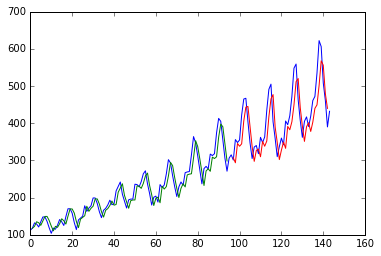

In [35]:

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/100
2s - loss: 0.0352
Epoch 2/100
2s - loss: 0.0133
Epoch 3/100
2s - loss: 0.0110
Epoch 4/100
2s - loss: 0.0098
Epoch 5/100
2s - loss: 0.0084
Epoch 6/100
2s - loss: 0.0072
Epoch 7/100
2s - loss: 0.0062
Epoch 8/100
2s - loss: 0.0054
Epoch 9/100
2s - loss: 0.0048
Epoch 10/100
2s - loss: 0.0044
Epoch 11/100
2s - loss: 0.0042
Epoch 12/100
2s - loss: 0.0040
Epoch 13/100
2s - loss: 0.0039
Epoch 14/100
2s - loss: 0.0038
Epoch 15/100
2s - loss: 0.0039
Epoch 16/100
2s - loss: 0.0038
Epoch 17/100
2s - loss: 0.0038
Epoch 18/100
2s - loss: 0.0037
Epoch 19/100
2s - loss: 0.0038
Epoch 20/100
2s - loss: 0.0037
Epoch 21/100
2s - loss: 0.0037
Epoch 22/100
2s - loss: 0.0037
Epoch 23/100
2s - loss: 0.0037
Epoch 24/100
2s - loss: 0.0036
Epoch 25/100
2s - loss: 0.0035
Epoch 26/100
2s - loss: 0.0035
Epoch 27/100
2s - loss: 0.0036
Epoch 28/100
2s - loss: 0.0035
Epoch 29/100
2s - loss: 0.0035
Epoch 30/100
2s - loss: 0.0036
Epoch 31/100
2s - loss: 0.0035
Epoch 32/100
2s - loss: 0.0035
Epoch 33/100
2s -

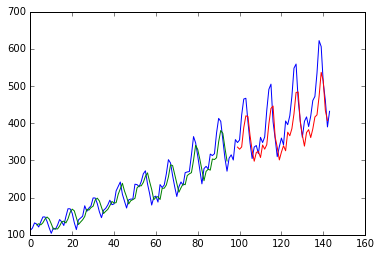

In [37]:

# LSTM for international airline passengers problem with time step regression framing
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('datasets/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [39]:
dataset[1:100,:]

array([[ 0.02702703],
       [ 0.05405405],
       [ 0.04826255],
       [ 0.03281853],
       [ 0.05984557],
       [ 0.08494207],
       [ 0.08494207],
       [ 0.06177607],
       [ 0.02895753],
       [ 0.        ],
       [ 0.02702703],
       [ 0.02123553],
       [ 0.04247104],
       [ 0.07142857],
       [ 0.05984557],
       [ 0.04054055],
       [ 0.08687258],
       [ 0.12741312],
       [ 0.12741312],
       [ 0.10424709],
       [ 0.05598456],
       [ 0.01930502],
       [ 0.06949806],
       [ 0.07915059],
       [ 0.08880308],
       [ 0.14285713],
       [ 0.11389962],
       [ 0.13127413],
       [ 0.14285713],
       [ 0.18339768],
       [ 0.18339768],
       [ 0.15444016],
       [ 0.11196911],
       [ 0.08108109],
       [ 0.1196911 ],
       [ 0.12934363],
       [ 0.14671814],
       [ 0.17181468],
       [ 0.14864865],
       [ 0.15250966],
       [ 0.22007722],
       [ 0.24324325],
       [ 0.26640925],
       [ 0.2027027 ],
       [ 0.16795367],
       [ 0